In [264]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ridge import RidgeRegression

In [265]:
#1- Data loading
ds = pd.read_csv('olympics_100m.csv', sep=',')

#Splitting traing/test
X = ds.loc[:,'Year'].values
y = ds.loc[:, 'Time'].values
X = X.reshape(len(ds),1)


#Split in training + validation and test  
#No shuffle since we have data ordered by time 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
   
#check the result obtained
print(X_train_val.shape)
print(X_test.shape)

(23, 1)
(6, 1)


In [266]:
k= 11
kf = TimeSeriesSplit(n_splits=k)

lambda_values = np.linspace(10**(-10), 10**4, 1000)

mse_values = []
mse_avg = []

for l in lambda_values:


    for i, (train_index, test_index) in enumerate(kf.split(X_train_val, y_train_val)):

        X_train, X_val = X_train_val[train_index], X_train_val[test_index]
        y_train, y_val = y_train_val[train_index], y_train_val[test_index]

        model = RidgeRegression(l)
        model.train(X_train,y_train)
        y_hat = model.predict(X_val)
        mse = model.MSE(y_hat,y_val)
        mse_values.append(mse)
        print(f'Fold {i} - Lambda {l} - MSE {mse}')
        
    mse_avg.append(np.mean(mse_values))
    mse_values = []
        

print(f'MSE values: {mse_avg}')
min_mse = np.argmin(mse_avg)
print(f'Min MSE: {min_mse}')
lambda_best = lambda_values[min_mse]
print(f'Best lambda: {lambda_best}')



Fold 0 - Lambda 1e-10 - MSE 0.20380451207598843
Fold 1 - Lambda 1e-10 - MSE 0.008618489642218348
Fold 2 - Lambda 1e-10 - MSE 0.0038478017045560048
Fold 3 - Lambda 1e-10 - MSE 0.000760299524230846
Fold 4 - Lambda 1e-10 - MSE 0.057045638390800874
Fold 5 - Lambda 1e-10 - MSE 0.03171007340774016
Fold 6 - Lambda 1e-10 - MSE 0.15936980170627393
Fold 7 - Lambda 1e-10 - MSE 0.016405037015034596
Fold 8 - Lambda 1e-10 - MSE 0.008987234712354882
Fold 9 - Lambda 1e-10 - MSE 0.03129682645059546
Fold 10 - Lambda 1e-10 - MSE 0.0072884643162478705
Fold 0 - Lambda 10.01001001010991 - MSE 0.2020725511416485
Fold 1 - Lambda 10.01001001010991 - MSE 0.008374831399885842
Fold 2 - Lambda 10.01001001010991 - MSE 0.003981826403405441
Fold 3 - Lambda 10.01001001010991 - MSE 0.0008126301448159894
Fold 4 - Lambda 10.01001001010991 - MSE 0.05665480357137744
Fold 5 - Lambda 10.01001001010991 - MSE 0.031465288341530374
Fold 6 - Lambda 10.01001001010991 - MSE 0.15889580734651723
Fold 7 - Lambda 10.01001001010991 - MS

In [267]:
#Coarse to fine validation
mse_values = []
mse_avg = []
lambda_coarse_to_fine = np.linspace(lambda_best / 10, lambda_best * 10, 1000)
for l in lambda_coarse_to_fine:

    for i, (train_index, test_index) in enumerate(kf.split(X_train_val)):

        X_train, X_val = X_train_val[train_index], X_train_val[test_index]
        y_train, y_val = y_train_val[train_index], y_train_val[test_index]

        model = RidgeRegression(l)
        model.train(X_train,y_train)
        y_hat = model.predict(X_val)
        mse = model.MSE(y_hat,y_val)
        mse_values.append(mse)
        print(f'Fold {i} - Lambda {l} - MSE {mse}')
        
    mse_avg.append(np.mean(mse_values))
    mse_values = []

print(f'MSE values: {mse_avg}')
min_mse = np.argmin(mse_avg)
print(f'Min MSE: {min_mse}')
lambda_best = lambda_coarse_to_fine[min_mse]
print(f'Best lambda: {lambda_best}')

Fold 0 - Lambda 255.25525525526274 - MSE 0.16440704158975505
Fold 1 - Lambda 255.25525525526274 - MSE 0.0036933239424664895
Fold 2 - Lambda 255.25525525526274 - MSE 0.007790897377062227
Fold 3 - Lambda 255.25525525526274 - MSE 0.00255948788339155
Fold 4 - Lambda 255.25525525526274 - MSE 0.04775008383342431
Fold 5 - Lambda 255.25525525526274 - MSE 0.025896993142685978
Fold 6 - Lambda 255.25525525526274 - MSE 0.1477395718213948
Fold 7 - Lambda 255.25525525526274 - MSE 0.013376966280916997
Fold 8 - Lambda 255.25525525526274 - MSE 0.007014793902447385
Fold 9 - Lambda 255.25525525526274 - MSE 0.02787526797456622
Fold 10 - Lambda 255.25525525526274 - MSE 0.005849221094079737
Fold 0 - Lambda 280.55082109136987 - MSE 0.16099095133054311
Fold 1 - Lambda 280.55082109136987 - MSE 0.0033375295531716436
Fold 2 - Lambda 280.55082109136987 - MSE 0.008235415647201507
Fold 3 - Lambda 280.55082109136987 - MSE 0.0027865187840542057
Fold 4 - Lambda 280.55082109136987 - MSE 0.046901281733354096
Fold 5 - La

In [268]:
#Our model
model = RidgeRegression(lambda_best)
model.train(X_train_val,y_train_val)
print(model.weights)
y_hat = model.predict(X_test)
model.MSE(y_hat,y_test)

print(f'MSE: {model.MSE(y_hat,y_test)}')

[ 3.44571170e+01 -1.23355588e-02]
MSE: 0.022824752388661277


In [269]:
#Scikit model
RidgeModel = Ridge(alpha=lambda_best, fit_intercept=True)
RidgeModel.fit(X_train_val,y_train_val)
print(f'Intercept:' + str(RidgeModel.intercept_))
print(f' Weights:' + str(RidgeModel.coef_))
y_hat_sk = RidgeModel.predict(X_test)

print(f'MSE (scikit): {mean_squared_error(y_test,y_hat_sk)}')

Intercept:34.457116976736295
 Weights:[-0.01233556]
MSE (scikit): 0.022824752388909356


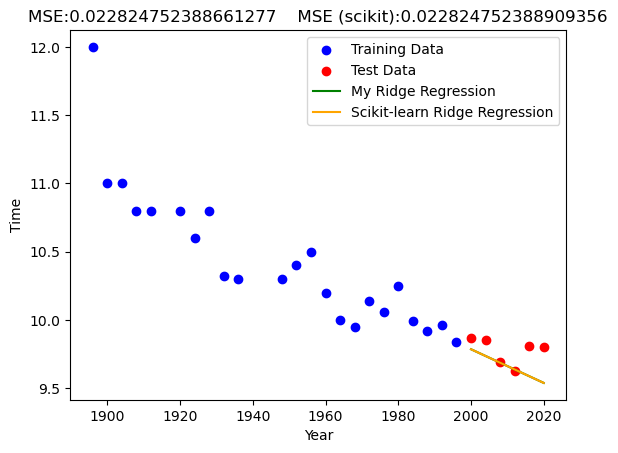

In [270]:
X_train_val = PolynomialFeatures(1).fit_transform(X_train_val)
X_test = PolynomialFeatures(1).fit_transform(X_test)    
# Plotting training data
plt.scatter(X_train_val[:, 1], y_train_val, color='blue', label='Training Data')
# Plotting test data
plt.scatter(X_test[:, 1], y_test, color='red', label='Test Data')

plt.plot(X_test[:, 1], y_hat, label='My Ridge Regression', color='green')
plt.plot(X_test[:,1], y_hat_sk, label='Scikit-learn Ridge Regression', color='orange')

plt.title('MSE:' + str(model.MSE(y_hat,y_test)) + '    MSE (scikit):' + str(mean_squared_error(y_test,y_hat_sk)))
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend()
plt.show()